**************
# Imports
**************

In [44]:
#!pip install pycountry

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick
!pip install folium
import folium
from folium.plugins import HeatMap





*******************
# Read Data
*******************

In [45]:
df = pd.read_csv('hotel_bookings.csv') 


In [46]:
df.head(118000)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117995,City Hotel,0,19,2017,August,32,7,1,5,3,...,No Deposit,9.0,NaN,0,Transient,239.00,1,3,Check-Out,2017-08-13
117996,City Hotel,0,182,2017,August,32,11,0,2,3,...,No Deposit,7.0,NaN,0,Transient,128.38,0,2,Check-Out,2017-08-13
117997,City Hotel,0,122,2017,August,32,10,0,3,2,...,No Deposit,14.0,NaN,0,Transient,112.50,0,1,Check-Out,2017-08-13
117998,City Hotel,0,160,2017,August,32,7,1,5,2,...,No Deposit,9.0,NaN,0,Transient,173.70,0,1,Check-Out,2017-08-13


In [47]:
df.shape

(119390, 32)

In [48]:
#description of dataset
df.describe()   

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [50]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

 *************************
 # Clean Data
 *************************

In [51]:
#Checking Null Values

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [52]:
#Handel missing value

In [53]:
df['country'].fillna('PRT',inplace=True)
df.fillna(0,inplace=True)
df.isnull().values.any()

False

In [54]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [55]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [56]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [57]:
resort = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)]
city   = df[(df['hotel']=='City Hotel')   &  (df['is_canceled']==0)]

In [58]:
df['hotel'].value_counts()


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

***************************************************
# Exploratory Data Analysis (EDA)
***************************************************

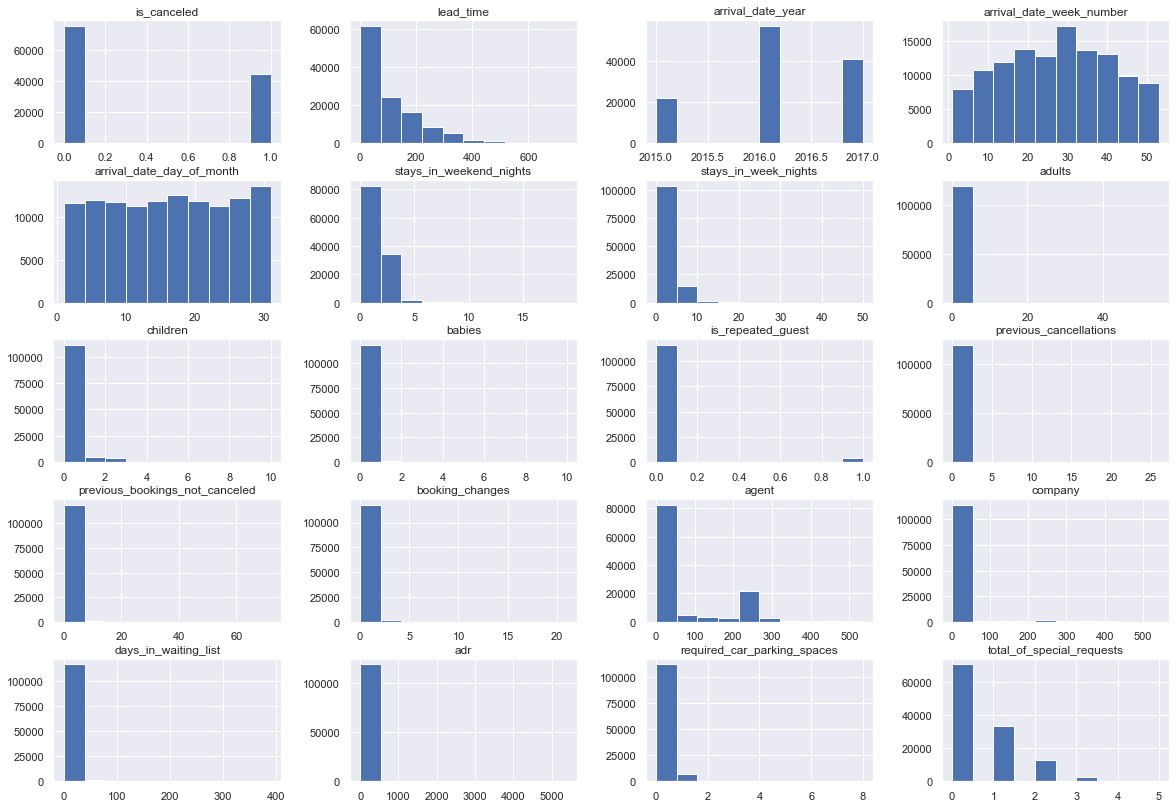

In [59]:
#HISTOGRAM
df.hist(figsize=(20,14))
plt.show()

In [60]:
#From where the most guests are coming ?

country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [61]:
#How Many Booking Were Cancelled?


def get_count(series, limit=None):

    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [62]:
x,y = get_count(df['is_canceled'])

In [63]:
#is_canceled have two unique values: 1 if booking got canceled, else 0.

def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



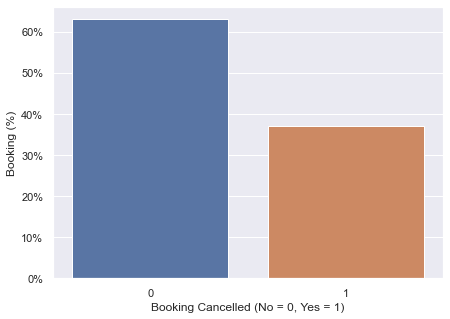

In [64]:
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

Bookings got canceled 37% of the time.
While booking guests did checks-in 
(did not cancel the booking ) almost 63% of the time.

In [65]:
df_not_canceled = df[df['is_canceled'] == 0]

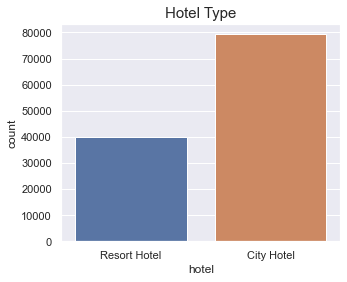

In [66]:
#********************************************
# Plot the countplot for both the hotel types
sns.set(style = "darkgrid")
plt.figure(figsize=(5,4))
plt.title('Hotel Type', fontdict = {'fontsize': 15})
sns.countplot(data=df, x = 'hotel')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



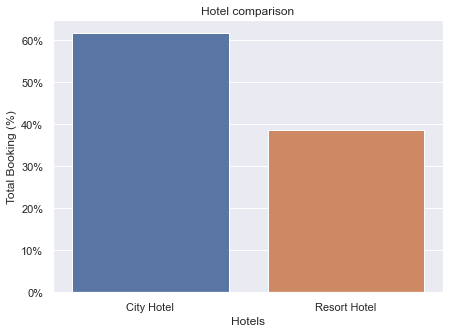

In [67]:
#What is the difference between a Resort Hotel and a City Hotel in terms of bookings?

x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

More than 60% of the population booked the City hotel

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



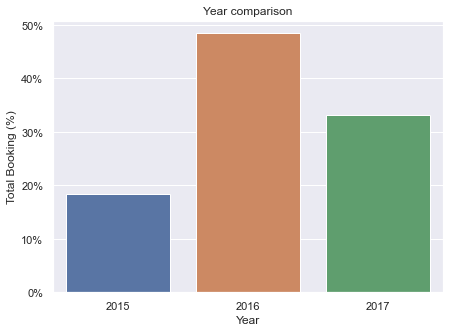

In [68]:
#*****************************************************
# the percentage of booking for each year
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

 
 More than double bookings were made in 2016,compared to the previous      year.But the bookings decreased by almost 15% the next year.


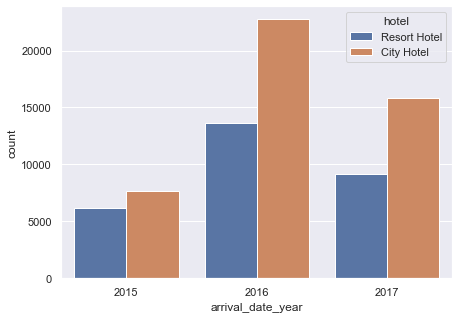

In [69]:
#separate by the hotel type

plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



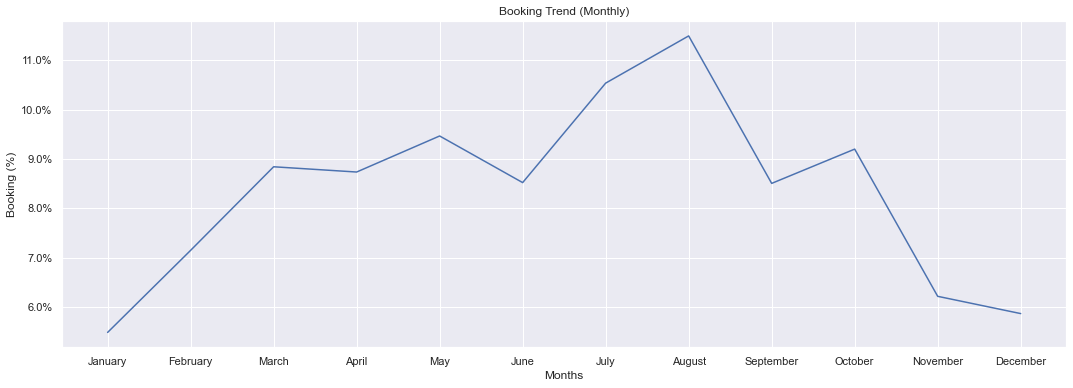

In [70]:
#Which is the busiest month for hotels?

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



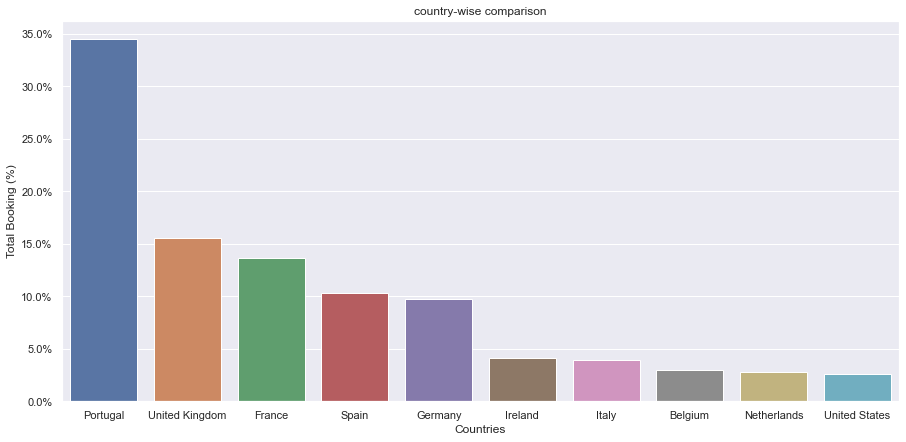

In [71]:
 #From which country most guests come?

import pycountry as pc

x,y = get_count(df_not_canceled['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))


Portugal, UK and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

In [72]:
#The most guests are coming ?

basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



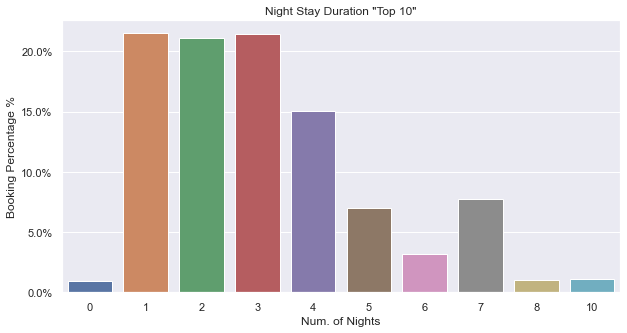

In [73]:
#People Stay in hotel

total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Num. of Nights', y_label='Booking Percentage %', title='Night Stay Duration "Top 10"', figsize=(10,5))


<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

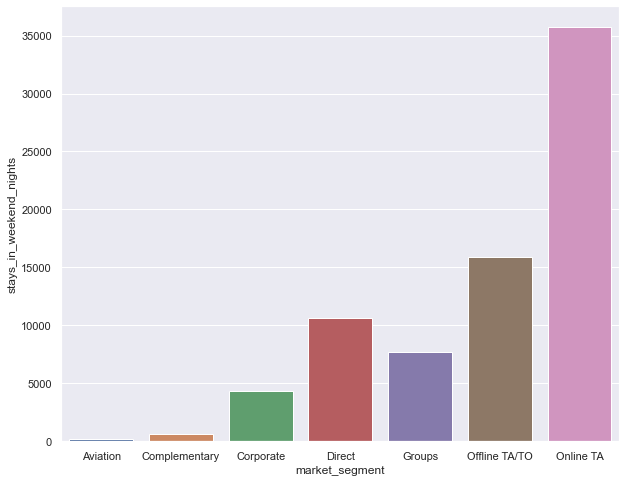

In [74]:
#Analysing preference of guests



plt.figure(figsize=(10,8))
sns.barplot(x=df[df['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count().index,
            y=df[df['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count())

The online travel agents are the best market for reservation by people

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



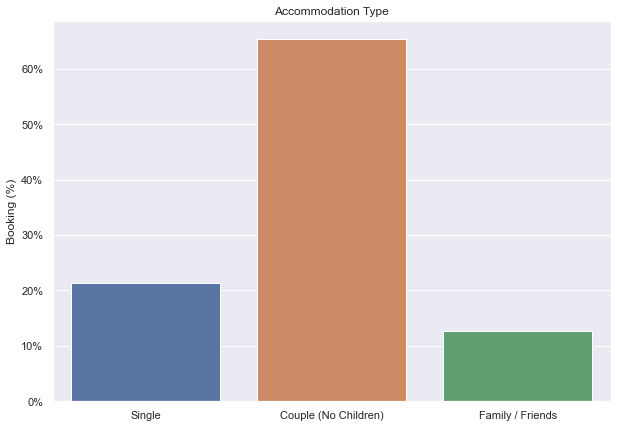

In [75]:

# Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


# Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


# Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

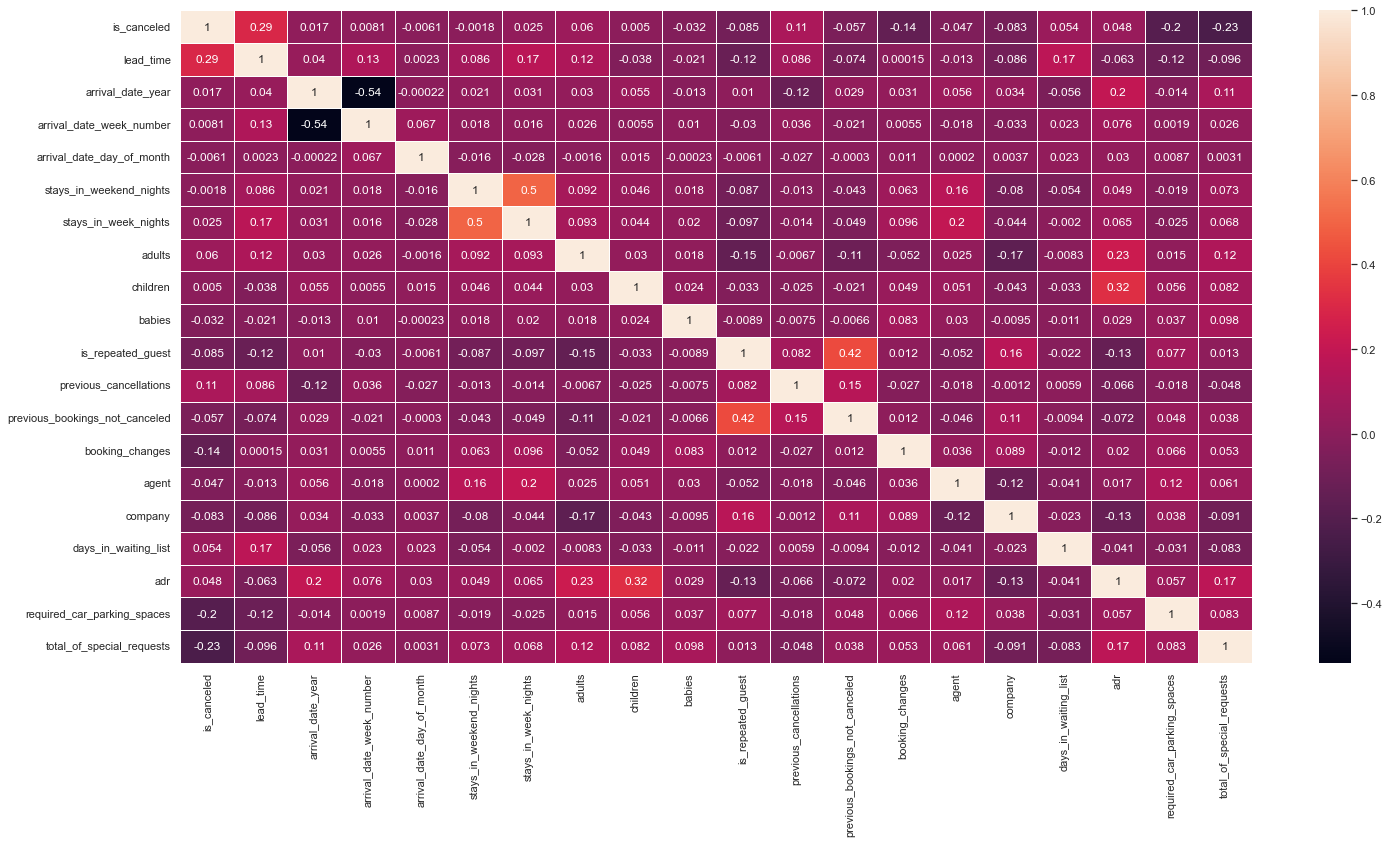

In [76]:
plt.figure(figsize = (24, 12))
corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

# Feature engineering

In [77]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [78]:
df = df.drop_duplicates()
len(df)

87377

In [79]:
label = ['company','agent','total_of_special_requests','required_car_parking_spaces',
         'is_repeated_guest','reservation_status_date','stays_in_weekend_nights','stays_in_week_nights',
         'reserved_room_type','adults','children','babies']
df.drop(labels=label,axis=1,inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,reservation_status
0,Resort Hotel,0,342,2015,July,27,1,BB,PRT,Direct,Direct,0,0,C,3,No Deposit,0,Transient,0.0,Check-Out
1,Resort Hotel,0,737,2015,July,27,1,BB,PRT,Direct,Direct,0,0,C,4,No Deposit,0,Transient,0.0,Check-Out
2,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,Direct,0,0,C,0,No Deposit,0,Transient,75.0,Check-Out
3,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,Corporate,0,0,A,0,No Deposit,0,Transient,75.0,Check-Out
4,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,TA/TO,0,0,A,0,No Deposit,0,Transient,98.0,Check-Out


In [80]:
X = df.drop(['is_canceled'],axis=1)
y = df['is_canceled']

In [81]:
X = pd.get_dummies(X,drop_first=True)

In [82]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [83]:
df.shape

(87377, 20)

*******************
# Modeling 
*******************

# Logistic Regression

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.9749141680018311
Confusion Matrix : 
[[15679   215]
 [  333  5618]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15894
           1       0.96      0.94      0.95      5951

    accuracy                           0.97     21845
   macro avg       0.97      0.97      0.97     21845
weighted avg       0.97      0.97      0.97     21845



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# KNeighborsClassifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.7206225680933852
Confusion Matrix : 
[[13769  2125]
 [ 3978  1973]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.78      0.87      0.82     15894
           1       0.48      0.33      0.39      5951

    accuracy                           0.72     21845
   macro avg       0.63      0.60      0.61     21845
weighted avg       0.70      0.72      0.70     21845



# DECISION TREE 

In [89]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 1.0
Confusion Matrix : 
[[15894     0]
 [    0  5951]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15894
           1       1.00      1.00      1.00      5951

    accuracy                           1.00     21845
   macro avg       1.00      1.00      1.00     21845
weighted avg       1.00      1.00      1.00     21845



In [90]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier'],
    'Score' : [acc_lr, acc_knn, acc_dtc]})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree Classifier,1.000000
0,Logistic Regression,0.974914
1,KNN,0.720623


In [92]:
px.bar(data_frame = models, x = 
       'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

# Conclusion

I used 3 models
1-Logistic Regression.
2-K_Neighbors.
3-Decision Tree.  

The Decision Tree model proved to be a better choice to predict whether a hotel booking would be cancelled given the current and prior booking information about the type of hotel, room, customer, stay, payment status, etc. While the balanced accuracy score of the Logistic Regression model was only slightly lower.


And I get an Accuracy score of 100 % using the DECISION TREE which is the highest among all models.


future work :

- This model will be useful in identifying bookings with a high likelihood of cancellation.

- Hotels can use this model to charge high cancellation fees for bookings that the model predicts will be cancelled.
